<a href="https://colab.research.google.com/github/Falanger-debug/Data-Visualization/blob/main/Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update
!apt-get install -y chromium-browser
!pip install selenium
!pip install webdriver-manager

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,833 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('--window-size=1280,1696')
options.add_argument('--disable-software-rasterizer')
options.binary_location = '/usr/bin/chromium-browser'

driver = webdriver.Chrome(options=options)

In [19]:
driver.get("https://katalogi.bn.org.pl/discovery/search?vid=48OMNIS_NLOP:48OMNIS_NLOP")
time.sleep(5)

# Wprowadzenie frazy do wyszukiwarki
print("🔍 Wyszukiwanie: Julian Tuwim")
search_box = driver.find_element(By.ID, "searchBar")
search_box.clear()
search_box.send_keys("Julian Tuwim")
search_box.send_keys(Keys.RETURN)
time.sleep(5)

books_links = []

for page_num in range(1, 11):
    print(f"\n Strona {page_num}")
    time.sleep(3)

    # Zbieranie wyników z jednej strony
    book_elements = driver.find_elements(By.CSS_SELECTOR, ".list-item-wrapper h3 a")
    for book in book_elements:
        title = book.text.strip()
        url = book.get_attribute("href")
        books_links.append({"Tytuł": title, "Link": url})

    # Próba przejścia do następnej strony
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a[aria-label='Przejdź do następnej strony']")
        driver.execute_script("arguments[0].click();", next_button)
        print(" Przejście do kolejnej strony...")
        time.sleep(3)
    except:
        print(" Brak przycisku „Dalej”.")
        break

print("\n Zebrano dane. Zamykanie przeglądarki.")
driver.quit()


🔍 Wyszukiwanie: Julian Tuwim

 Strona 1
 Przejście do kolejnej strony...

 Strona 2
 Przejście do kolejnej strony...

 Strona 3
 Przejście do kolejnej strony...

 Strona 4
 Przejście do kolejnej strony...

 Strona 5
 Przejście do kolejnej strony...

 Strona 6
 Przejście do kolejnej strony...

 Strona 7
 Przejście do kolejnej strony...

 Strona 8
 Przejście do kolejnej strony...

 Strona 9
 Przejście do kolejnej strony...

 Strona 10
 Przejście do kolejnej strony...

 Zebrano dane. Zamykanie przeglądarki.


In [27]:
df = pd.DataFrame(books_links)
print(len(df))
df.head()

100


,Tytuł,Link
0,Julian Tuwim / Julian Tuwim.,https://katalogi.bn.org.pl/discovery/fulldispl...
1,Julian Tuwim / Jolanta Zajkowska.,https://katalogi.bn.org.pl/discovery/fulldispl...
2,Julian Tuwim / Jadwiga Sawicka.,https://katalogi.bn.org.pl/discovery/fulldispl...
3,Julian Tuwim / Joanna Zajkowska.,https://katalogi.bn.org.pl/discovery/fulldispl...
4,Julian Tuwim / Artur Sandauer.,https://katalogi.bn.org.pl/discovery/fulldispl...


In [28]:
books = []

driver = webdriver.Chrome(options=options)

for idx, link in enumerate(df['Link']):
    book = {}

    try:
        driver.get(link)
        time.sleep(2)

        details = driver.find_elements(By.CSS_SELECTOR, '#details .section-body .layout-row')
        for detail in details:
            try:
                key = detail.find_element(By.CSS_SELECTOR, '.flex-gt-xs-25.flex-gt-sm-20.flex').text.strip()
                data = detail.find_element(By.CSS_SELECTOR, '.item-details-element-container.flex').text.strip()
                book[key] = data
            except:
                continue

        book['Link'] = link
        books.append(book)
        print(f"({idx + 1}) Dodano książkę")

    except Exception as e:
        print(f" Błąd przy linku: {link}\n⛔ {e}")

driver.quit()

df_details = pd.DataFrame(books)


(1) Dodano książkę
(2) Dodano książkę
(3) Dodano książkę
(4) Dodano książkę
(5) Dodano książkę
(6) Dodano książkę
(7) Dodano książkę
(8) Dodano książkę
(9) Dodano książkę
(10) Dodano książkę
(11) Dodano książkę
(12) Dodano książkę
(13) Dodano książkę
(14) Dodano książkę
(15) Dodano książkę
(16) Dodano książkę
(17) Dodano książkę
(18) Dodano książkę
(19) Dodano książkę
(20) Dodano książkę
(21) Dodano książkę
(22) Dodano książkę
(23) Dodano książkę
(24) Dodano książkę
(25) Dodano książkę
(26) Dodano książkę
(27) Dodano książkę
(28) Dodano książkę
(29) Dodano książkę
(30) Dodano książkę
(31) Dodano książkę
(32) Dodano książkę
(33) Dodano książkę
(34) Dodano książkę
(35) Dodano książkę
(36) Dodano książkę
(37) Dodano książkę
(38) Dodano książkę
(39) Dodano książkę
(40) Dodano książkę
(41) Dodano książkę
(42) Dodano książkę
(43) Dodano książkę
(44) Dodano książkę
(45) Dodano książkę
(46) Dodano książkę
(47) Dodano książkę
(48) Dodano książkę
(49) Dodano książkę
(50) Dodano książkę
(51) Doda

Udało się zebrać dane 100 książek

In [33]:
print(len(df_details))
df_details.columns

100


Index(['Tytuł', 'Twórca', 'Serie', 'Opis fizyczny', 'Wydawca',
       'Data publikacji', 'Forma i typ', 'Przynależność kulturowa', 'Temat',
       'Gatunek', 'UKD', 'Język', 'Link', 'Jest częścią', 'Uwaga',
       'Dziedzina i ujęcie', 'Identyfikator', 'Bibliografia', 'Inny tytuł',
       'Wydanie', 'Zawartość', 'Odbiorca', 'Tytuły powiązane',
       'Częstotliwość'],
      dtype='object')

Jak widać, mamy kolumny, które nie są nam potrzebne. Z tego powodu usuwam je z dataframe'u.

In [40]:
df_details_clean = df_details.drop(columns = ['Bibliografia', 'UKD', 'Jest częścią', 'Uwaga', 'Częstotliwość', 'Odbiorca', 'Identyfikator', 'Forma i typ'])

In [41]:
df_details_clean.columns

Index(['Tytuł', 'Twórca', 'Serie', 'Opis fizyczny', 'Wydawca',
       'Data publikacji', 'Przynależność kulturowa', 'Temat', 'Gatunek',
       'Język', 'Link', 'Dziedzina i ujęcie', 'Inny tytuł', 'Wydanie',
       'Zawartość', 'Tytuły powiązane'],
      dtype='object')

Przyjrzyjmy się jednej z publikacji

In [42]:
for column in df_details_clean.columns:
    print(f"{column}: {df_details_clean[column][0]}")


Tytuł: Julian Tuwim / Julian Tuwim.
Twórca: Tuwim, Julian (1894-1953) Autor
Czytelnik Wydawca
Serie: Poeci Polscy (seria)
Poeci Polscy.
Opis fizyczny: 127, [1] strona ; 10 cm.
Wydawca: Warszawa : "Czytelnik"
Data publikacji: 1965
Przynależność kulturowa: Literatura polska
Temat: 1901-2000
Gatunek: Wiersze
Język: polski
Link: https://katalogi.bn.org.pl/discovery/fulldisplay?docid=alma9912995327605606&context=L&vid=48OMNIS_NLOP:48OMNIS_NLOP&lang=pl&search_scope=NLOP_IZ_NZ&adaptor=Local%20Search%20Engine&isFrbr=true&tab=LibraryCatalog&query=any%2Ccontains%2CJulian%20Tuwim&offset=0
Dziedzina i ujęcie: nan
Inny tytuł: nan
Wydanie: nan
Zawartość: nan
Tytuły powiązane: nan


Przyjrzałbym się teraz rozkładowi gatunków w publikacjach

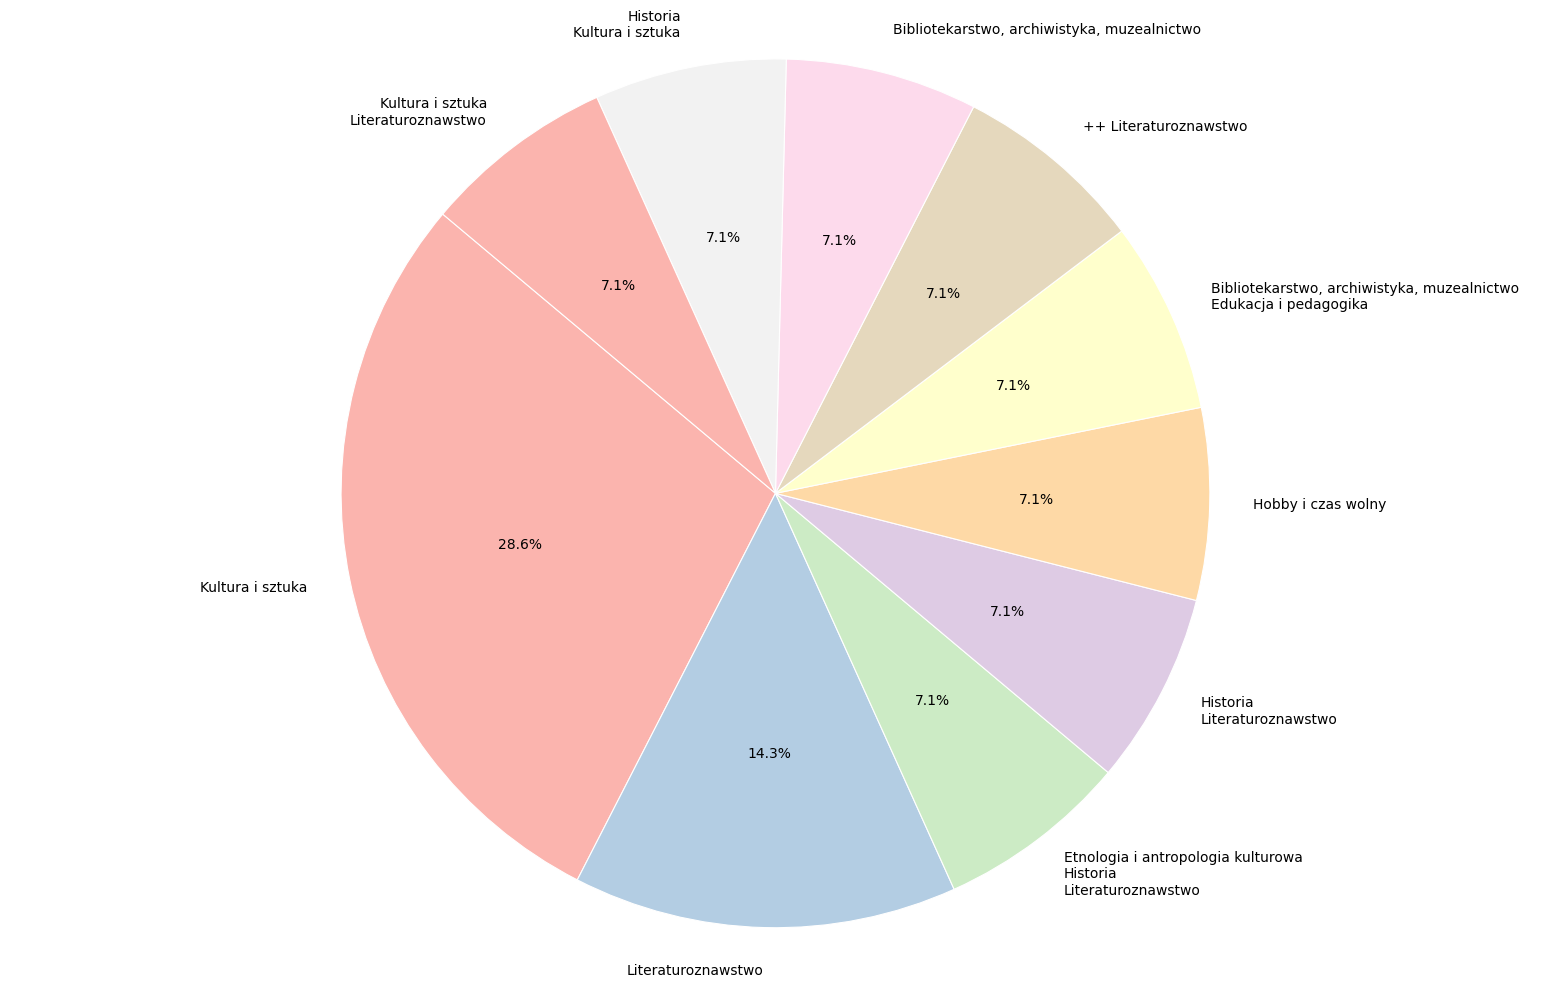

In [44]:
import matplotlib.pyplot as plt

genres = df_details_clean['Dziedzina i ujęcie'].value_counts()
proc = genres / genres.sum() * 100

plt.figure(figsize=(16, 10))
proc.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 4 else '',  # tylko istotniejsze wartości
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.8}
)

plt.axis('equal')
plt.ylabel('')
plt.tight_layout()
plt.show()


Przejdę do roku publikacji, ciekawe czy o Julianie Tuwimie dalej głośno czy już raczej nie.

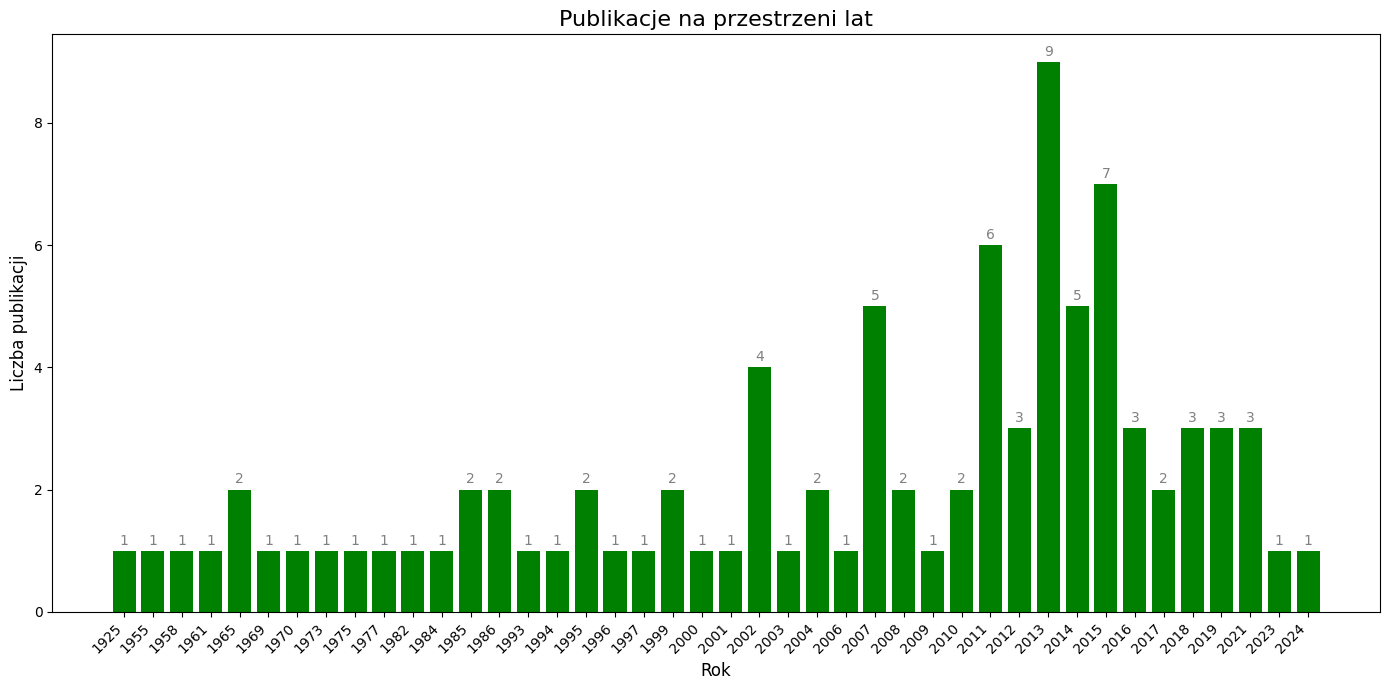

In [47]:
import matplotlib.pyplot as plt

df_details_clean['Rok'] = df_details_clean['Data publikacji'].str.extract(r'(\d{4})')[0]

publikacje_per_rok = df_details_clean['Rok'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.bar(publikacje_per_rok.index, publikacje_per_rok.values, color='green')

plt.title('Publikacje na przestrzeni lat', fontsize=16, weight='light')
plt.xlabel('Rok', fontsize=12)
plt.ylabel('Liczba publikacji', fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(publikacje_per_rok.values):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()


Wygląda na to, że nie został on zapomniany. Cieszy mnie to niezmiernie.

A w jakich językach o nim piszą? Czy jest coś innego niż nasz język ojczysty?

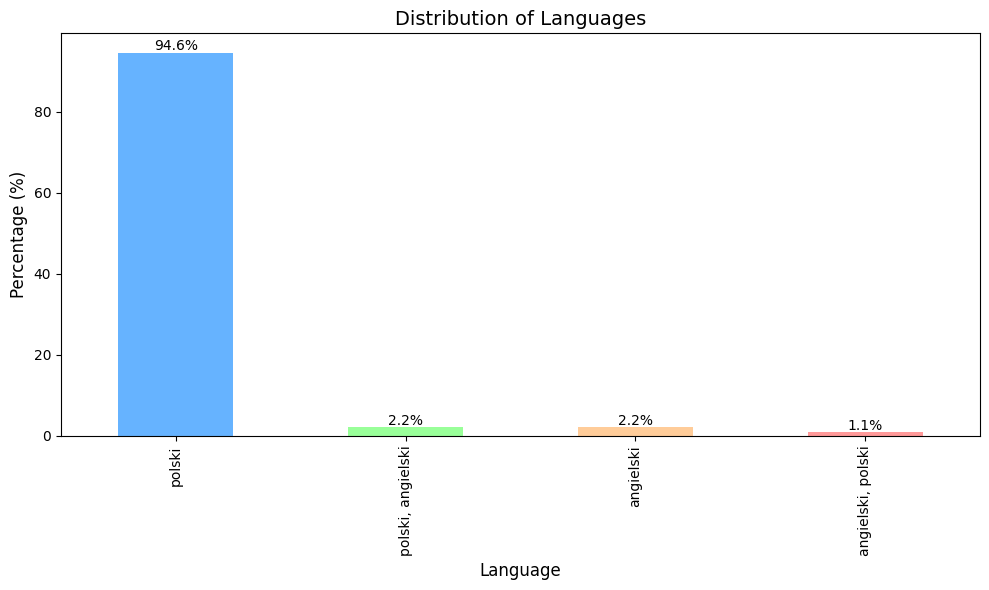

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

def extract_main_languages(language_str):
    if pd.isna(language_str):
        return None

    langs = [lang.strip().lower() for lang in str(language_str).split('\n')]
    main_languages = {'polski', 'angielski', 'niemiecki'}
    filtered_langs = [lang for lang in langs if lang in main_languages]

    return ', '.join(filtered_langs) if filtered_langs else None

df_details_clean['Język_clean'] = df_details_clean['Język'].apply(extract_main_languages)
languages_count = df_details_clean['Język_clean'].value_counts()
languages_percentage = languages_count / languages_count.sum() * 100

plt.figure(figsize=(10, 6))
languages_percentage.plot(kind='bar', color=['#66b3ff','#99ff99','#ffcc99','#ff9999'])

plt.title('Distribution of Languages', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(languages_percentage):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Jak się okazuje, publikacje związane z Julianem Tuwiem są napisane w języku polskim prawie zawsze.